# Name: Zizhao He

## Assignment 4: Exploring Yelp Reviews

**NOTE: THIS ASSIGNMENT IS OPTIONAL**

You must complete **one** out of homeworks #4, #5, and #6.

**Due date: Thursday, 10/17 by the end of class**

In this assignment, we'll explore restaurant review data available through the [Yelp Dataset Challenge](https://www.yelp.com/dataset/challenge). The dataset includes Yelp data for user reviews and business information for 10 metropolitan areas. The `data` directory in this repository includes data files for reviews and restaurants in 3 of these cities: Cleveland, Pittsburgh, and Charlotte. These cities were chosen since the data is not too large — the data for the other cities can be downloaded from the Yelp download page. For this assignment, you are welcome to analyze data any of the three cities. 

This assignment is broken into two parts:

#### Part 1: testing how well sentiment analysis works.

Because Yelp reviews include the number of stars given by the user, the Yelp data set provides a unique opportunity to test how well our sentiment analysis works by comparing the number of stars to the polarity of reviews.

#### Part 2: analyzing correlations between restaurant reviews and census data

We'll explore geographic trends in the restaurant reviews, comparing our sentiment analysis results with user stars geographically. We'll also overlay review stars on maps of household income (using census data).
    
#### Background readings
- [Does sentiment analysis work?](http://varianceexplained.org/r/yelp-sentiment/)
- [The Geography of Taste: Using Yelp to Study Urban Culture](https://www.mdpi.com/2220-9964/7/9/376/pdf/1)

## 1. Does Sentiment Analysis Work?

In this part, we'll load the data, perform a sentiment analysis, and explore the results.

### 1.1 Load review data

You can choose data from Cleveland, Charlotte, or Pittsburgh. The data is stored as a JSON file and you can use `pandas.read_json` to load it. 

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [99]:
import geopandas as gpd
import pandas as pd

In [100]:
review_charlotte = pd.read_json(r'C:\Users\alber\OneDrive\Desktop\MUSA620\HW4\assignment-4-zizhaohe-master\data\reviews_charlotte.json\reviews_charlotte.json', orient='records', lines=True)
review_charlotte

,business_id,review_id,stars,text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...
...,...,...,...,...
208496,n-AQFKbW6MnpamdtA6ECpQ,nUIPZ0BODU-gglP6uPqUGw,1,"I wish i could give this place, management, an..."
208497,ny8YcGEViSGKWxo69xfiiA,q-H_TRASxlSeFZdKHwdV3g,2,I'd recommend a road trip to Lexington instead...
208498,9Xm2GfG8Rnbb1_CmXyrm3g,4B9k5hmmLWV_lhIYvVcPWA,5,Wonderful spot (the patio) and OH SO EXCELLENT...
208499,KLluzHXsTV0zCw48EJTEEg,xAGjI9H26i8BmtKcaqy3Tg,4,So glad we stopped at Londa's\nThey had a wide...


### 1.2 Format the review text

The first step is to split the review text into its individual words and make all of the words lower-cased.

Add a new column, called 'formatted_text', which each entry is a list of the lower-cased words in a review.

In [101]:
review_charlotte['formatted_text'] = [text.lower().split()
                            for text in review_charlotte['text']]

In [102]:
review_charlotte.head()

,business_id,review_id,stars,text,formatted_text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,"[such, a, unique, place, &, a, great, find., o..."
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,"[easily, entering, my, top, 3, restaurants, in..."
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,"[this, random, hole, in, the, wall, is, locate..."
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...,"[yum!!, had, the, kale, grits, and, would, def..."
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...,"[overall, the, food, is, really, good., we, ha..."


### 1.3 Review stop words

Use the `nltk` library to remove any stop words from the list of words in each review. 

Overwrite the 'formatted_text' column to contain a list of lower-cased words in each review, with no stop words. 

In [103]:
import nltk
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [104]:
stop_words = list(set(nltk.corpus.stopwords.words('english')))
stop_words

['how',
 'by',
 'himself',
 'its',
 'for',
 'i',
 'over',
 'will',
 'am',
 "needn't",
 't',
 'don',
 'so',
 'off',
 'o',
 'here',
 'down',
 'our',
 'to',
 'from',
 "haven't",
 'then',
 'but',
 'weren',
 'who',
 'haven',
 'if',
 'won',
 "shan't",
 'having',
 "wouldn't",
 'nor',
 'they',
 'be',
 'such',
 'couldn',
 'same',
 'll',
 'while',
 'why',
 'd',
 've',
 'these',
 'your',
 's',
 'doing',
 'their',
 'myself',
 'hasn',
 'as',
 'before',
 'out',
 'yourselves',
 'hers',
 'been',
 'both',
 'under',
 'herself',
 'than',
 'few',
 'aren',
 'we',
 'further',
 'once',
 "hadn't",
 'very',
 'do',
 'can',
 'all',
 "didn't",
 'most',
 "you'll",
 'and',
 'no',
 'doesn',
 "mightn't",
 'she',
 'isn',
 'he',
 "couldn't",
 "it's",
 'being',
 "weren't",
 'has',
 'yourself',
 'ma',
 'her',
 'ours',
 'other',
 'between',
 'them',
 'this',
 'each',
 'm',
 'shouldn',
 "aren't",
 "won't",
 'is',
 'of',
 'below',
 'hadn',
 'did',
 'some',
 'my',
 'his',
 'an',
 'about',
 'were',
 "wasn't",
 'does',
 'into'

In [105]:
import string
punctuation = list(string.punctuation)
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [107]:
# Combine the list of stop words and punctuation
ignored = stop_words + punctuation
ignored

['how',
 'by',
 'himself',
 'its',
 'for',
 'i',
 'over',
 'will',
 'am',
 "needn't",
 't',
 'don',
 'so',
 'off',
 'o',
 'here',
 'down',
 'our',
 'to',
 'from',
 "haven't",
 'then',
 'but',
 'weren',
 'who',
 'haven',
 'if',
 'won',
 "shan't",
 'having',
 "wouldn't",
 'nor',
 'they',
 'be',
 'such',
 'couldn',
 'same',
 'll',
 'while',
 'why',
 'd',
 've',
 'these',
 'your',
 's',
 'doing',
 'their',
 'myself',
 'hasn',
 'as',
 'before',
 'out',
 'yourselves',
 'hers',
 'been',
 'both',
 'under',
 'herself',
 'than',
 'few',
 'aren',
 'we',
 'further',
 'once',
 "hadn't",
 'very',
 'do',
 'can',
 'all',
 "didn't",
 'most',
 "you'll",
 'and',
 'no',
 'doesn',
 "mightn't",
 'she',
 'isn',
 'he',
 "couldn't",
 "it's",
 'being',
 "weren't",
 'has',
 'yourself',
 'ma',
 'her',
 'ours',
 'other',
 'between',
 'them',
 'this',
 'each',
 'm',
 'shouldn',
 "aren't",
 "won't",
 'is',
 'of',
 'below',
 'hadn',
 'did',
 'some',
 'my',
 'his',
 'an',
 'about',
 'were',
 "wasn't",
 'does',
 'into'

In [108]:
# Remove stop words from each list of words in reviews
review_charlotte['formatted_text'] = [[word for word in text if word not in ignored]
              for text in review_charlotte['formatted_text']]

review_charlotte['formatted_text']

0         [unique, place, great, find., waitress, funny,...
1         [easily, entering, top, 3, restaurants, charlo...
2         [random, hole, wall, located, park, rd., shopp...
3         [yum!!, kale, grits, would, definitely, again!...
4         [overall, food, really, good., bruschetta, see...
                                ...                        
208496    [wish, could, give, place,, management,, staff...
208497    [i'd, recommend, road, trip, lexington, instea...
208498    [wonderful, spot, (the, patio), oh, excellent,...
208499    [glad, stopped, londa's, wide, variety, choice...
208500    [atmosphere, nice, restaurant., received, food...
Name: formatted_text, Length: 208501, dtype: object

### 1.4 Calculate polarity and subjectivity

Using the formatted text column, create a list of `textblob.TextBlob()` objects and then extract the `subjectivity` and `polarity`.

Add two new columns to the review DataFrame: `polarity` and `subjectivity`.

**Note: the polarity/subjectivity calculation can take several minutes to run**

In [109]:
import textblob

In [110]:
blobs = [textblob.TextBlob(str(t)) for t in review_charlotte['formatted_text']]

In [111]:
review_charlotte['polarity'] = [b.sentiment.polarity for b in blobs]

In [112]:
review_charlotte['subjectivity'] = [b.sentiment.subjectivity for b in blobs]

In [113]:
review_charlotte.head()

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...,"[unique, place, great, find., waitress, funny,...",0.404167,0.841667
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...,"[easily, entering, top, 3, restaurants, charlo...",0.609896,0.683333
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...,"[random, hole, wall, located, park, rd., shopp...",0.332738,0.521032
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...,"[yum!!, kale, grits, would, definitely, again!...",0.418750,0.750000
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...,"[overall, food, really, good., bruschetta, see...",0.274524,0.517540


### 1.5 Comparing the sentiment analysis to number of stars 

Use `seaborn` to make two box plots, one showing the polarity vs number of user stars and one showing the subjectivity vs the number of user stars.

In [114]:
from matplotlib import pyplot as plt
import seaborn as sns

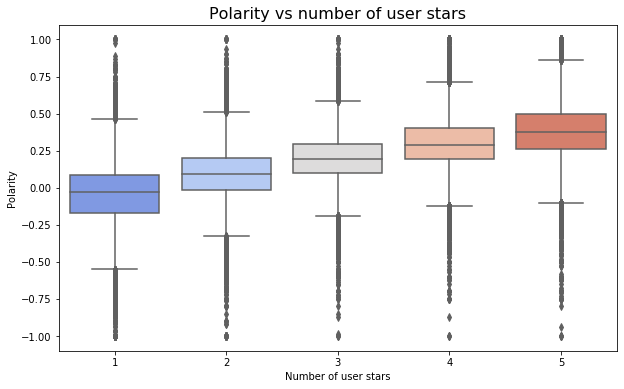

In [115]:
# Box plot for polarity vs number of user stars
# create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# box plot
ax = sns.boxplot(x="stars", y="polarity", data=review_charlotte, palette = "coolwarm")

# format
ax.set_xlabel("Number of user stars")
ax.set_ylabel("Polarity")
ax.set_title("Polarity vs number of user stars", fontsize=16);

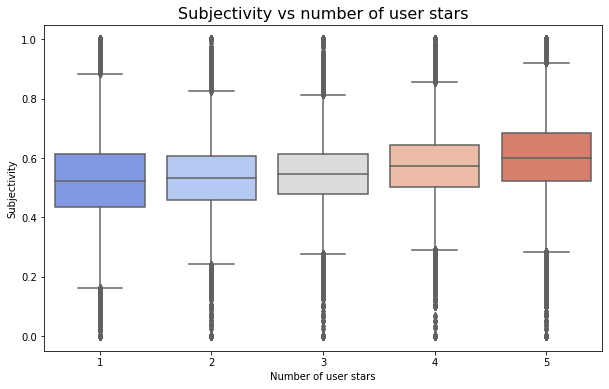

In [116]:
# Box plot for subjectivity vs the number of user stars
# create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# box plot
ax = sns.boxplot(x="stars", y="subjectivity", data=review_charlotte, palette = "coolwarm")

# format
ax.set_xlabel("Number of user stars")
ax.set_ylabel("Subjectivity")
ax.set_title("Subjectivity vs number of user stars", fontsize=16);

**Question:** What do your charts indicate for the effectiveness of our sentiment analysis?

Answer:
According to my charts, both of the polarity and subjectivity scores seem positively correlated with the user ratings that the users who gave more stars always have higher polarity and subjectivity in their reviews. So, our sentiment analysis worked. However, both of the two charts indicated that there's a large amount of prediction errors.

### 1.6 The importance of individual words

In this part, we'll explore the importance and frequency of individual words in Yelp reviews.

We will identify the most common reviews and then plot the average polarity vs the user stars for the reviews where those words occur. 

#### 1.6.1 Select a random sample of the review data

Select 1,000 random rows from the DataFrame holding the review data. Use the `.sample()` function to perform the selection.

In [117]:
Reviews = review_charlotte.sample(n=1000)
Reviews.head()

,business_id,review_id,stars,text,formatted_text,polarity,subjectivity
65241,QIcXq4Z3_2lvg9rmmoGF-A,-lHZ1HPih37VFqHcp-Upag,4,Great salad bar and selection. To-die-for Garl...,"[great, salad, bar, selection., to-die-for, ga...",0.486201,0.580519
103510,yesClkCZlpLGTYZROkx4SA,Y-YScnSplwdoUYO4lbRaxA,5,I loved Krazy Fish! The atmosphere is eclecti...,"[loved, krazy, fish!, atmosphere, eclectic, di...",0.426111,0.655556
149870,MtSEQlqTj3Pup-wBY-dKfA,Jo-3naFutjB5xZvHEP1q-g,4,Large portions and better than average food. G...,"[large, portions, better, average, food., good...",0.071429,0.392857
19576,vxadNrpTY7OHNmWsrEpNnA,t0VOy3hBdQXSf-LBNwX4KA,1,Meh. That's about all I have to say about this...,"[meh., that's, say, place., sticky, menus,, st...",0.257143,0.627679
161031,RVQE2Z2uky4c0-njFQO66g,0zfV82NyW8SCn5T_FDCARw,4,Good BBQ! I tried the salmon with creamed corn...,"[good, bbq!, tried, salmon, creamed, corn, als...",0.422500,0.498333


#### 1.6.2 Re-format the data

Pass the subset of review data from the previous part to the `reshape_data()` function defined below. Explore the result of this function, and in one or two sentences, explain the operation performed by `reshape_data()`. 

In [118]:
def reshape_data(review_subset):
    """
    Reshape the input dataframe of review data.
    """
    from pandas import Series, merge
    
    X = (review_subset['formatted_text']
         .apply(Series)
         .stack()
         .reset_index(level=1, drop=True)
         .to_frame('word'))
    
    
    R = review_subset[['polarity', 'stars', 'review_id']]
    
    return merge(R, X, left_index=True, right_index=True).reset_index(drop=True)

In [119]:
review = reshape_data(Reviews)
review.head()

,polarity,stars,review_id,word
0,0.32602,5,pJjzEghj0L4jPEclBRFZ9g,lang
1,0.32602,5,pJjzEghj0L4jPEclBRFZ9g,van
2,0.32602,5,pJjzEghj0L4jPEclBRFZ9g,one
3,0.32602,5,pJjzEghj0L4jPEclBRFZ9g,largest
4,0.32602,5,pJjzEghj0L4jPEclBRFZ9g,menus


**Question:** what is the operation performed by the `reshape_data()` function?

Answer: The "reshape_data()" function reshaped the input dataframe of the review data by giving every word in the review texts a single row, so that several rows would have same information for polarity, star numbers and review id. Then, this function subsetted the original dataframe to only keep four columns: polarity, stars, review_id, and a new column with the words (one for each row).

#### 1.6.3 Calculate the average number of stars and polarity for each word

Using the result from 1.6.2, group by the "word" column, and calculate the following three quantities:
1. the size of each group 
1. the average number of user stars for each word
1. the average polarity for each word

Combine these three results into a single DataFrame object.  

**Hint:** you can combine the three results using either the `pandas.concat()` or the `pandas.merge()` function.

In [120]:
size = review.groupby(['word']).size() 
size = size.reset_index()
size.columns = ['word', 'size']
size

,word,size
0,!!,6
1,!!!,1
2,!!!!,1
3,"""a",1
4,"""andrew"",",1
...,...,...
12130,zu,1
12131,zucchini,3
12132,zucchini.,3
12133,~ernie,1


In [121]:
mean_stars = review.groupby(['word'])['stars'].mean()
mean_stars = mean_stars.reset_index()
mean_stars.columns = ['word', 'mean_stars']
mean_stars

,word,mean_stars
0,!!,4.166667
1,!!!,1.000000
2,!!!!,5.000000
3,"""a",5.000000
4,"""andrew"",",4.000000
...,...,...
12130,zu,5.000000
12131,zucchini,4.333333
12132,zucchini.,3.666667
12133,~ernie,5.000000


In [122]:
mean_polarity = review.groupby(['word'])['polarity'].mean()
mean_polarity = mean_polarity.reset_index()
mean_polarity.columns = ['word', 'mean_polarity']
mean_polarity

,word,mean_polarity
0,!!,0.035208
1,!!!,-0.636784
2,!!!!,0.318601
3,"""a",0.419444
4,"""andrew"",",0.418944
...,...,...
12130,zu,0.000000
12131,zucchini,0.312886
12132,zucchini.,0.287686
12133,~ernie,0.291415


In [123]:
result = pd.merge(size, mean_stars, on=['word'])
Result = pd.merge(result, mean_polarity, on=['word'])
Result.head()

,word,size,mean_stars,mean_polarity
0,!!,6,4.166667,0.035208
1,!!!,1,1.000000,-0.636784
2,!!!!,1,5.000000,0.318601
3,"""a",1,5.000000,0.419444
4,"""andrew"",",1,4.000000,0.418944


#### 1.6.4 Select words the occur at least 50 times in reviews

Trim your DataFrame from the last section to only include words that occurred at least 50 times. Remember, when you grouped by the 'word' column, the `size()` function told you how many times each word occurred. 

In [124]:
selected = Result.loc[Result['size']>=50]
selected.head()

,word,size,mean_stars,mean_polarity
599,2,62,3.209677,0.166275
639,3,62,3.000000,0.159983
680,5,56,3.392857,0.193938
1009,also,194,3.835052,0.248529
1020,always,150,4.193333,0.323892


#### 1.6.5 Plot the average polarity vs user stars

Use `matplotlib` to make a scatter plot of the average user stars vs average polarity for the words in the data frame from the last section. This will involve two steps:

Loop over each row of the data frame from the last section and for each row:

1. Use `plt.scatter(x, y)` to plot a scatter plot, where x is polarity and y is stars. 
1. Use `plt.text(x, y, word)` to add the corresponding word to each scatter marker.

Using the data frame from section 1.4, add vertical and horizontal lines to your chart that shows the average number of user stars and the average polarity across all reviews in the data set. 

Make sure the figure is big enough so that you can make out some of the words, especially at low and high polarity values. You should be able to see a strong trend between polarity and user stars, and some of the most common words occurring in these reviews. 

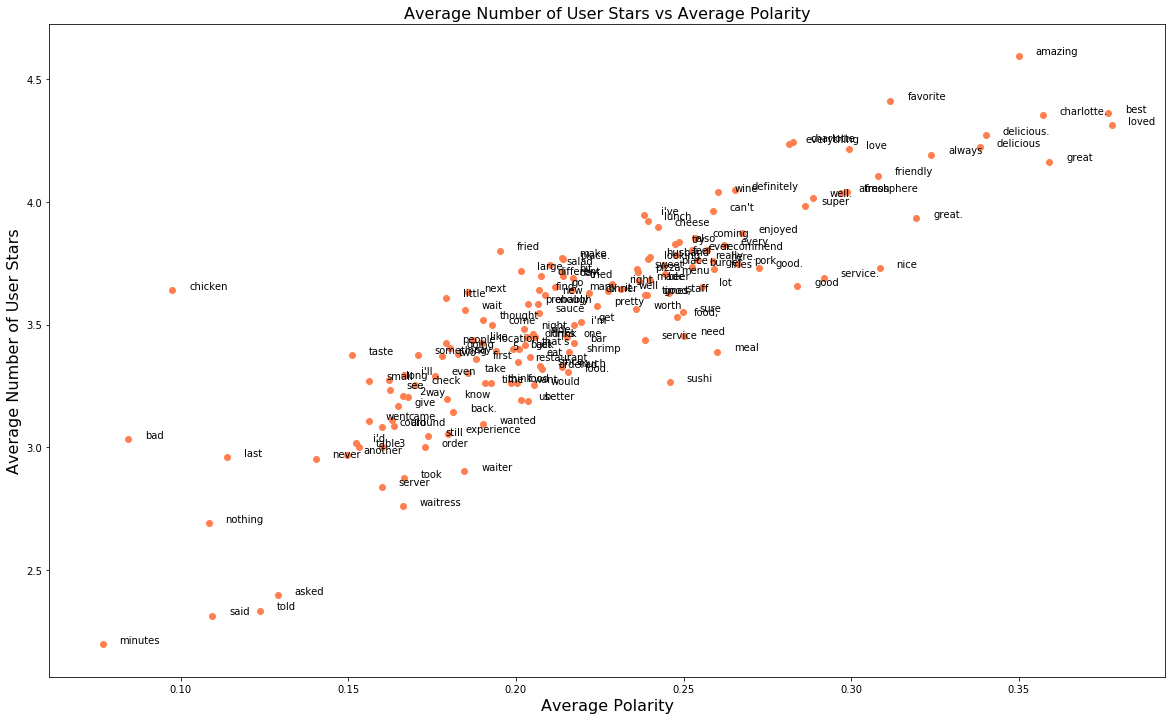

In [159]:
z = selected['word']
x = selected['mean_polarity']
y = selected['mean_stars']
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(20, 12))
for (x_cor, y_cor, label) in zip(x, y, z):
    plt.scatter(x_cor, y_cor, color='coral')
    plt.text(x_cor + 0.005, y_cor + 0.005, label)
ax.set_title("Average Number of User Stars vs Average Polarity", fontsize=16)
ax.set_xlabel("Average Polarity", fontsize=16)
ax.set_ylabel("Average Number of User Stars", fontsize=16);  

## 2. Correlating restaurant data and household income

In this part, we'll use the census API to download household income data and overlay restaurant locations.

### 2.1 Query the Census API

Use the `census` package to download total household income by census tract from the 2017 ACS data set. You can identify the proper variable name from:

https://api.census.gov/data/2017/acs/acs5/variables.html

At the end of this step, you should have a pandas DataFrame holding the income data for all census tracts within the county being analyzed.

**Hints**

The FIPS codes for the various state/counties are: 

- Pittsburgh
    - PA code: '42'
    - County code: '003' (Allegheny County)
- Cleveland
    - OH code: '39'
    - County code: '035' (Cuyahoga County)
- Charlotte
    - NC code: '37'
    - County code: '119' (Mecklenburg County)

In [126]:
from census import Census

In [129]:
# initialize with API key
api_key = '4ab00b6ae60df4f767292dfcbbdf40b6242b2440'
c = Census(key=api_key)

In [130]:
variables = ('NAME', 'B19001_001E')
HHInc_tracts = c.acs5.state_county_tract(variables, '37', '119', "*")

In [131]:
HHInc_tracts = pd.DataFrame(HHInc_tracts)
HHInc_tracts.head()

,NAME,B19001_001E,state,county,tract
0,"Census Tract 11, Mecklenburg County, North Car...",1107.0,37,119,001100
1,"Census Tract 23, Mecklenburg County, North Car...",1098.0,37,119,002300
2,"Census Tract 31.05, Mecklenburg County, North ...",1688.0,37,119,003105
3,"Census Tract 43.02, Mecklenburg County, North ...",1770.0,37,119,004302
4,"Census Tract 5, Mecklenburg County, North Caro...",2588.0,37,119,000500


### 2.2 Download census tracts from the Census and merge the data from Part 2.1

- Use the `us` package to identify the URL of the census tracts for the state being analyzed
- Merge the downloaded census tracts with the income DataFrame, making sure to specify the proper columns to perform the merge on.

In [132]:
import us

In [133]:
us.states.NC.shapefile_urls()

{'tract': 'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_37_tract10.zip',
 'cd': 'https://www2.census.gov/geo/tiger/TIGER2010/CD/111/tl_2010_37_cd111.zip',
 'county': 'https://www2.census.gov/geo/tiger/TIGER2010/COUNTY/2010/tl_2010_37_county10.zip',
 'state': 'https://www2.census.gov/geo/tiger/TIGER2010/STATE/2010/tl_2010_37_state10.zip',
 'zcta': 'https://www2.census.gov/geo/tiger/TIGER2010/ZCTA5/2010/tl_2010_37_zcta510.zip',
 'block': 'https://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/tl_2010_37_tabblock10.zip',
 'blockgroup': 'https://www2.census.gov/geo/tiger/TIGER2010/BG/2010/tl_2010_37_bg10.zip'}

In [134]:
# URL for NC census tracts
NC_tracts_URL = us.states.NC.shapefile_urls('tract')

In [135]:
# Read into a GeoDataFrame
NC_census_tracts = gpd.read_file(NC_tracts_URL)
NC_census_tracts.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,37,153,970100,37153970100,9701,Census Tract 9701,G5020,S,246281647,2106825,+35.0503203,-079.6180454,"POLYGON ((-79.56728699999999 34.994798, -79.56..."
1,37,153,970200,37153970200,9702,Census Tract 9702,G5020,S,457736198,7835811,+35.0967892,-079.8225512,"POLYGON ((-79.71752599999999 35.173596, -79.71..."
2,37,153,970800,37153970800,9708,Census Tract 9708,G5020,S,139358521,2752112,+34.8508484,-079.8201950,"POLYGON ((-79.76773 34.856008, -79.76775099999..."
3,37,153,970900,37153970900,9709,Census Tract 9709,G5020,S,23311020,78240,+34.8785679,-079.7346295,"POLYGON ((-79.76773 34.856008, -79.76773299999..."
4,37,153,971000,37153971000,9710,Census Tract 9710,G5020,S,49233222,188190,+34.9395795,-079.6628977,"POLYGON ((-79.69038399999999 34.893845, -79.69..."


In [136]:
HHInc_tracts_final = NC_census_tracts.merge(
    HHInc_tracts,
    left_on=["STATEFP10", "COUNTYFP10", "TRACTCE10"],
    right_on=["state", "county", "tract"],
)

In [137]:
HHInc_tracts_final.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,NAME,B19001_001E,state,county,tract
0,37,119,002004,37119002004,20.04,Census Tract 20.04,G5020,S,4649380,31255,+35.1467548,-080.7795670,"POLYGON ((-80.771693 35.1441, -80.771502 35.14...","Census Tract 20.04, Mecklenburg County, North ...",2122.0,37,119,002004
1,37,119,002600,37119002600,26,Census Tract 26,G5020,S,704620,0,+35.2100741,-080.8316138,"POLYGON ((-80.83581 35.207936, -80.835802 35.2...","Census Tract 26, Mecklenburg County, North Car...",483.0,37,119,002600
2,37,119,005815,37119005815,58.15,Census Tract 58.15,G5020,S,5318561,180790,+35.0872209,-080.7979171,"POLYGON ((-80.814297 35.08695, -80.813401 35.0...","Census Tract 58.15, Mecklenburg County, North ...",1549.0,37,119,005815
3,37,119,005710,37119005710,57.10,Census Tract 57.10,G5020,S,2865490,19970,+35.1847331,-080.7056854,"POLYGON ((-80.70535699999999 35.19235, -80.705...","Census Tract 57.10, Mecklenburg County, North ...",1811.0,37,119,005710
4,37,119,004900,37119004900,49,Census Tract 49,G5020,S,881859,0,+35.2427608,-080.8428441,"POLYGON ((-80.847865 35.24265, -80.847753 35.2...","Census Tract 49, Mecklenburg County, North Car...",224.0,37,119,004900


### 2.3 Plot a choropleth map of the household income

Use the built-in `geopandas` `plot()` function. 

Be sure to convert to a reasonable CRS first!

In [138]:
HHInc_tracts_final.crs

{'init': 'epsg:4269'}

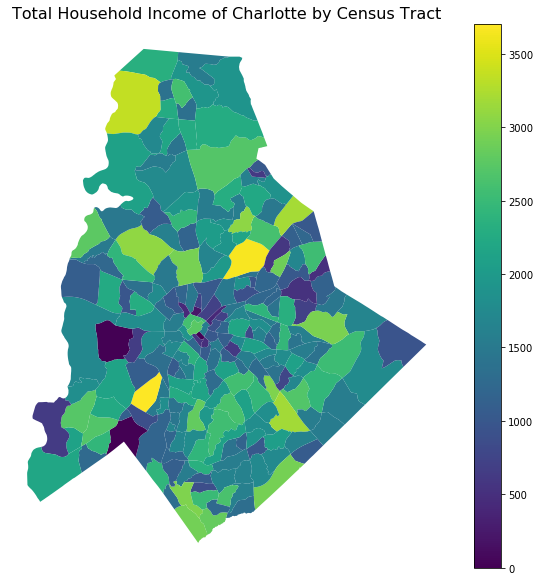

In [139]:
fig, ax = plt.subplots(figsize=(10,10))

# Plot the choropleth
HHInc_tracts_final.to_crs(epsg=3857).plot(ax=ax, column='B19001_001E', legend=True)

# Format
ax.set_title("Total Household Income of Charlotte by Census Tract", fontsize=16)
ax.set_axis_off()

### 2.4 Load the restaurants data

Use the `latitude` and `longitude` columns to create a GeoDataFrame after loading the JSON data.

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [140]:
Restaurants = pd.read_json(r'C:\Users\alber\OneDrive\Desktop\MUSA620\HW4\assignment-4-zizhaohe-master\data\restaurants_charlotte.json\restaurants_charlotte.json', orient='records', lines=True)
Restaurants.head()

,business_id,latitude,longitude,name,review_count,stars
0,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0
1,BvYU3jvGd0TJ7IyZdfiN2Q,35.156338,-80.831878,Manzetti's Tavern,16,3.5
2,_J_x_RaYTqAqAuCwgRhnRQ,35.172028,-80.746801,Kabob House,15,3.0
3,U3kygJOTlTQFlfaZS7sQjA,35.199798,-80.842295,JJ's Red Hots - Dilworth,380,4.0
4,CsLQLiRoafpJPJSkNX2h5Q,35.194894,-80.767442,Middle East Deli,5,3.0


In [141]:
restaurants = gpd.GeoDataFrame(
    Restaurants, geometry=gpd.points_from_xy(Restaurants.longitude, Restaurants.latitude), crs={"init": "epsg:4326"})

In [142]:
restaurants.head()

,business_id,latitude,longitude,name,review_count,stars,geometry
0,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-80.859132 35.092564)
1,BvYU3jvGd0TJ7IyZdfiN2Q,35.156338,-80.831878,Manzetti's Tavern,16,3.5,POINT (-80.831878 35.156338)
2,_J_x_RaYTqAqAuCwgRhnRQ,35.172028,-80.746801,Kabob House,15,3.0,POINT (-80.746801 35.172028)
3,U3kygJOTlTQFlfaZS7sQjA,35.199798,-80.842295,JJ's Red Hots - Dilworth,380,4.0,POINT (-80.842294693 35.1997979674)
4,CsLQLiRoafpJPJSkNX2h5Q,35.194894,-80.767442,Middle East Deli,5,3.0,POINT (-80.767442 35.194894)


### 2.5 Overlay restaurants on the income map

Overlay the restaurants and color the points according to the 'stars' column. 

You can use the 'coolwarm' color map: blue points will have below-average reviews and red points will have above-average stars. 

**Hint**

You can use the `.geometry.total_bounds` attribute to get the axes limits of the county's census tracts. 

```python
[xmin, ymin, xmax, ymax] = income.geometry.total_bounds
```

You can then use these limits to set the matplotlib plot limits accordingly.

In [143]:
# make sure we remove missing geometries
restaurants = restaurants.loc[restaurants.geometry.notnull()]

# convert to a better CRS
restaurants = restaurants.to_crs(epsg=3857)

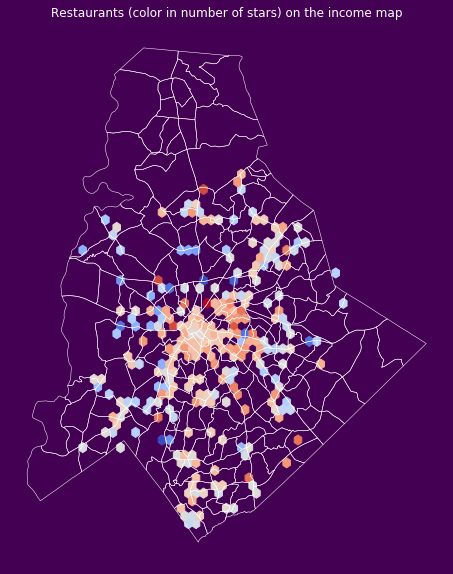

In [152]:
# initialize the axes
fig, ax = plt.subplots(figsize=(10, 10), facecolor=plt.get_cmap('viridis')(0))
[xmin, ymin, xmax, ymax] = HHInc_tracts_final.geometry.total_bounds
# plot the hexbins 
X = restaurants.to_crs(epsg=3857)
ax.hexbin(X.geometry.x, X.geometry.y, gridsize=40, mincnt=1, C = X['stars'], cmap='coolwarm')
plt.title('Restaurants (color in number of stars) on the income map', color='white')
# overlay the income map
HHInc_tracts_final.to_crs(epsg=3857).plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='white')

ax.set_axis_off()

### 2.6 Comparing polarity vs. stars geographically

- Merge the restaurants GeoDataFrame with the DataFrame with the 'polarity' column for each review. 
- Make a side-by-side plot with two columns: one subplot shows hex bins giving the polarity of the restaurant review and the other shows hex bins giving the number of stars

As we saw in Section 1, you should see strong correlation between the two subplots. 

**Hints**
- The 'business_id' column should be present in both the data frames holding review data and restaurant data.
- See the `plt.subplots()` function for creating a figure with 2 subplots.


In [145]:
Compare = pd.merge(restaurants, review_charlotte, on=['business_id'])
Compare.head()

,business_id,latitude,longitude,name,review_count,stars_x,geometry,review_id,stars_y,text,formatted_text,polarity,subjectivity
0,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),F7POrJsNbhu493DSTMPXjw,2,"Husband was craving Chicken Teriyaki & gyoza, ...","[husband, craving, chicken, teriyaki, gyoza,, ...",0.040179,0.697619
1,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),c-6aA9Bd7JxpmMroRoas9A,4,Went there Saturday noon they open at 12pm but...,"[went, saturday, noon, open, 12pm, people, wai...",0.300000,0.441667
2,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),P_MV_lMQjLIO9R7M_KIuMg,2,Went to this restaurant on Saturday as I had a...,"[went, restaurant, saturday, craving, japanese...",0.154605,0.439474
3,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),dCLBdXP9tjjQG7EkHNeWzQ,5,This place will always have a place in my stom...,"[place, always, place, stoma....errr...heart.,...",0.177689,0.496750
4,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-9001197.400226092 4176467.347614866),GiBx0zRVxC1Bu-9R-MMF8w,4,"Well first time I've really had ""authentic"" Ja...","[well, first, time, i've, really, ""authentic"",...",0.091250,0.573333


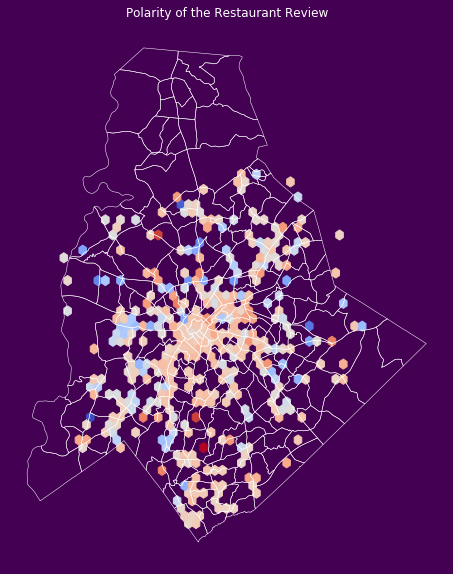

In [155]:
# Polarity of the Restaurant Review
# initialize the axes
fig, ax = plt.subplots(figsize=(10, 10), facecolor=plt.get_cmap('viridis')(0))
[xmin, ymin, xmax, ymax] = Compare.geometry.total_bounds

# plot the hexbins 
X = Compare.to_crs(epsg=3857)
ax.hexbin(X.geometry.x, X.geometry.y, gridsize=40, mincnt=1, C = X['polarity'], cmap='coolwarm')
plt.title('Polarity of the Restaurant Review', color='white')
# overlay the income map
HHInc_tracts_final.to_crs(epsg=3857).plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='white')

ax.set_axis_off()

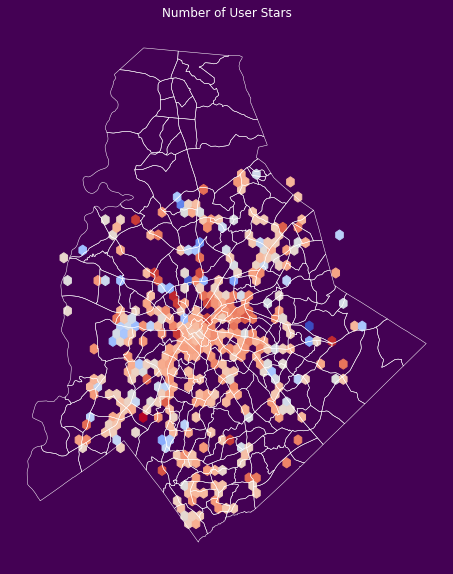

In [154]:
# Number of User Stars
# initialize the axes
fig, ax = plt.subplots(figsize=(10, 10), facecolor=plt.get_cmap('viridis')(0))
[xmin, ymin, xmax, ymax] = Compare.geometry.total_bounds

# plot the hexbins 
X = Compare.to_crs(epsg=3857)
ax.hexbin(X.geometry.x, X.geometry.y, gridsize=40, mincnt=1, C = X['stars_y'], cmap='coolwarm')
plt.title('Number of User Stars', color='white')
# overlay the income map
HHInc_tracts_final.to_crs(epsg=3857).plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='white')

ax.set_axis_off()

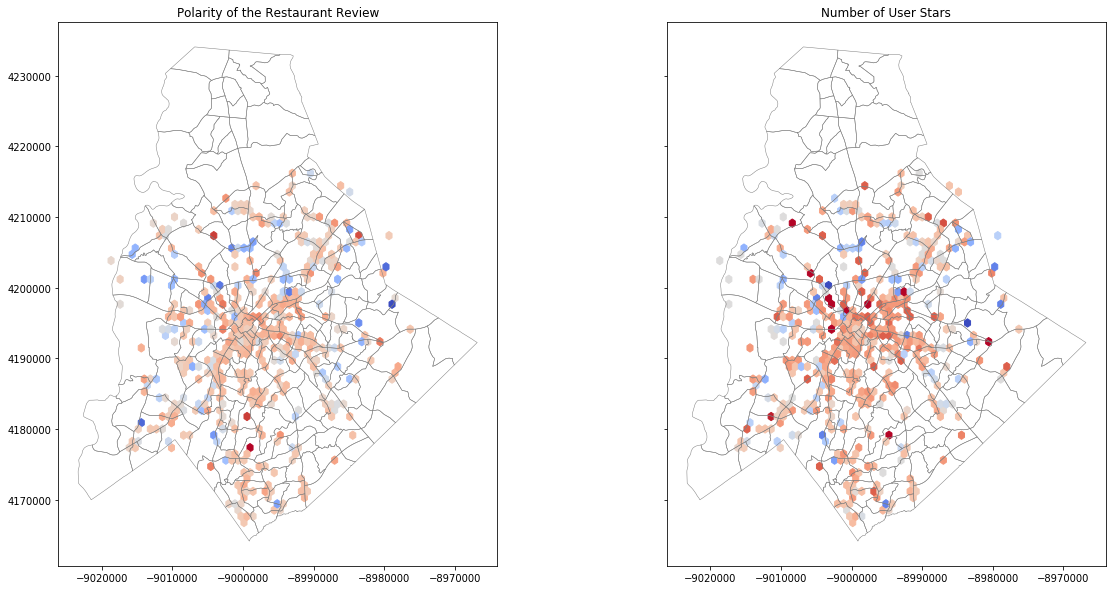

In [158]:
# Creates two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), sharey=True)
[xmin, ymin, xmax, ymax] = Compare.geometry.total_bounds
X = Compare.to_crs(epsg=3857)

val1 = ax1.hexbin(X.geometry.x, X.geometry.y, C = X['polarity'], gridsize=50, mincnt=1, cmap='coolwarm')
ax1.set_title('Polarity of the Restaurant Review')
# overlay the ZIP codes
HHInc_tracts_final.to_crs(epsg=3857).plot(ax=ax1, facecolor='none', linewidth=0.5, edgecolor='grey')


val2 = ax2.hexbin(X.geometry.x, X.geometry.y, C = X['stars_x'], gridsize=50, mincnt=1, cmap='coolwarm')
ax2.set_title('Number of User Stars')
# overlay the income map
HHInc_tracts_final.to_crs(epsg=3857).plot(ax=ax2, facecolor='none', linewidth=0.5, edgecolor='grey')
